# Day 3: Intro to machine learning
On the last day, we'll explore the Pandas and Scikit Learn packages for simple machine learning tasks using geoscience data examples. After this day, students will have a good overview of how to look at large datasets and solve problems with state-of-the-art machine learning tools.
- Machine learning concepts
- What is it that you’re trying to solve? How can machine learning help?
- What's the difference between supervised and unsupervised methods?
- What's the difference between classification and regression?
- What is artificial intelligence, and what is deep learning?



<img src="images/ML_loop.png"></img>

## Machine learning concepts

### The machine learning iterative loop
- Data — Getting the data. How to load it and put it in an `array` and/or `DataFrame`
- Processing — data exploration, inspection, cleaning, and feature engineering.
- Model – What is a model? Training a Scikit-Learn model.
- Results – assessing quality and performance metrics (accuracy, recall, F1, confusion matrices)
- Repeat – What can we do to improve performance?
- **Exercise: predicting a missing well log.**
- **Exercise: Hugoton lithology prediction contest.**
- **Exercise: Something to do with seismic **

### Data management for machine learning
- DataFrames: A new way to look at well logs.
- **Exercise: loading a DataFrame from a CSV.**
- **Exercise: building a DataFrame from LAS file.**
- DataFrames vs arrays (vs Hadoop, Dask, or what-have-you).




## Basic Pandas

Introduces the concept of a `DataFrame` in Python. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels.

To import the library (we will give it a common short alias):

In [5]:
import pandas as pd

The most common data structure in Pandas is the `DataFrame`. A 2D structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays). Columns are usually labelled as well using strings.

An easy way to think about a `DataFrame` is if you imagine it as an Excel spreadsheet.

Let's define one using a numpy array:

In [18]:
arr =  [[1.23, 'sandstone'],
        [3.654, 'limestone'],
        [0.998, 'shale']]

df = pd.DataFrame(arr, index=['d', 'b', 'a'], columns=['param1', 'lithology'])
df

,param1,lithology
d,1.230,sandstone
b,3.654,limestone
a,0.998,shale


In [19]:
df.loc[df['param1'] > 1,'param1']

d    1.230
b    3.654
Name: param1, dtype: float64

Accessing the data is a bit more complex than in the numpy array cases but for good reasons

In [7]:
df.loc['a','lithology'] # .loc[index, column]

'shale'

Add more data (row wise)

In [8]:
df.loc['e'] = [5.6, 'shale']
df

,param1,lithology
d,1.230,sandstone
b,3.654,limestone
a,0.998,shale
e,5.600,shale


Add data (column wise)

In [9]:
df["NewCol"] = [1, 2, 3, 4]
df

,param1,lithology,NewCol
d,1.230,sandstone,1
b,3.654,limestone,2
a,0.998,shale,3
e,5.600,shale,4


Pandas also reads files from disk in tabular form ([here](http://pandas.pydata.org/pandas-docs/version/0.20/io.html)'s a list of all the formats that it can read and write). A very common one is CSV, so let's load one!

In [27]:
df = pd.read_csv("Day_3_exercises/2016_ML_contest_training_data.csv")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


# Let's inspect the `DataFrame`

Using the `DataFrame` with well log information loaded before, we can make a summary using the `describe()` method of the `DataFrame` object

In [28]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


## Calculate RHOB from DeltaPHI and PHIND

In [29]:
def compute_density_porosity(PHIND, DeltaPHI):
    """
    In the Hugoton dataset, convert the atypical values of PHIND and
    DeltaPHI into Density Porosity or (bulk density)
    PHIND     : The mean of neutron porosity and density porosity
    DeltaPHI  : The difference between neutron porosity and density porosity
    returns   : Density porosity
    """
    phi_rhob = 2*(df.PHIND/100)/(1 - df.DeltaPHI/100) - df.DeltaPHI/100
    return phi_rhob


def rhob(phi_rhob, Rho_matrix= 2650.0, Rho_fluid=1000.0):
    """
    Rho_matrix (sandstone) : 2.65 g/cc
    Rho_matrix (Limestome): 2.71 g/cc
    Rho_matrix (Dolomite): 2.876 g/cc
    Rho_matrix (Anyhydrite): 2.977 g/cc
    Rho_matrix (Salt): 2.032 g/cc

    Rho_fluid (fresh water): 1.0 g/cc (is this more mud-like?)
    Rho_fluid (salt water): 1.1 g/cc
    see wiki.aapg.org/Density-neutron_log_porosity
    returns density porosity log """
    
    return Rho_matrix*(1 - phi_rhob) + Rho_fluid*phi_rhob


In [30]:
phi_rhob = compute_density_porosity(df['PHIND'], df['DeltaPHI'])
calc_RHOB = rhob(phi_rhob)
# add the calculated RHOB column to the data frame
df['RHOB'] = calc_RHOB

We can define a Python dictionary to relate facies with the integer label on the `DataFrame`

In [31]:
facies_dict = {'sandstone':1, 'c_siltstone':2, 'f_siltstone':3, 'marine_silt_shale':4,
               'mudstone':5, 'wackentstone':6, 'dolomite':7, 'packstone':8, 'bafflestone':9}

We can easily visualize the properties of each facies and how they compare using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

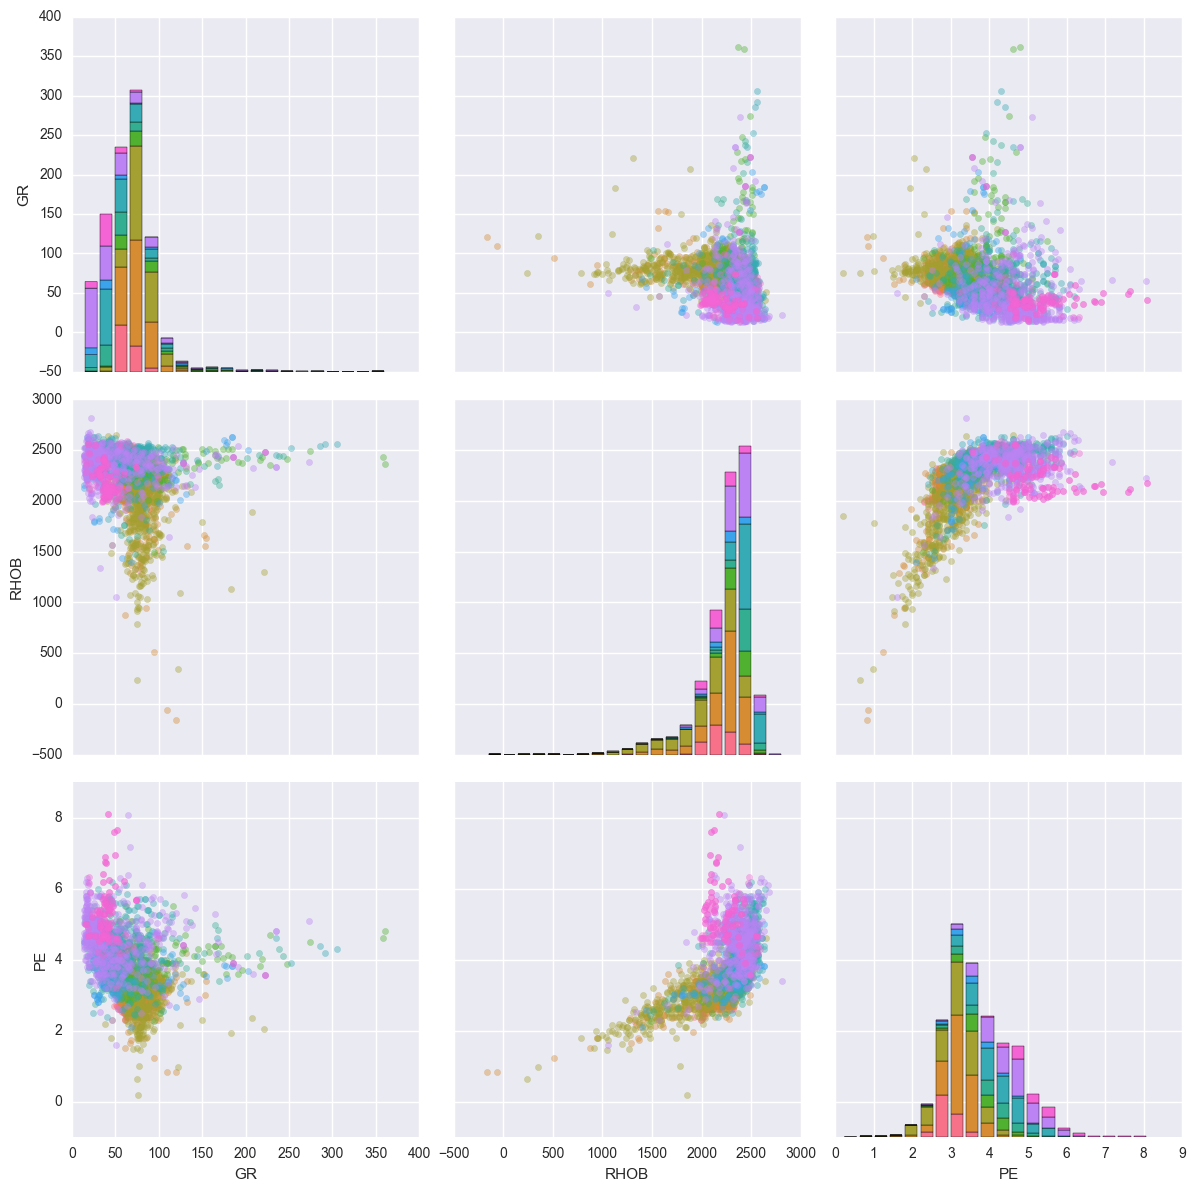

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

g = sns.PairGrid(df, hue='Facies', vars=['GR','RHOB','PE'], size=4)  
g.map_upper(plt.scatter,**dict(alpha=0.4))  
g.map_lower(plt.scatter,**dict(alpha=0.4))
g.map_diag(plt.hist,**dict(bins=20))  
# g.add_legend()
# g.set(alpha=0.5)

It is very clear that it's hard to separate these facies in feature space. Let's just select a couple of facies and using Pandas, select the rows in the `DataFrame` that contain information about those facies 

In [34]:
sand = df[(df.Facies == facies_dict['sandstone'])]
baff = df[(df.Facies == facies_dict['bafflestone'])]

It would be nice to have those two `DataFrames` merged into one. Let's use the `DataFrame` method `append()` for that.

In [35]:
selected_df = sand.append(baff)
selected_df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,RHOB
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,4.066667,2858.330952,56.976576,0.449269,2.238429,14.208710,3.826648,1.383333,0.452271,2206.867694
std,3.894226,163.225860,22.028152,0.266856,3.495720,4.162828,1.289168,0.486778,0.219897,146.151026
min,1.000000,2585.000000,14.840000,-0.025949,-19.500000,2.300000,2.242000,1.000000,0.074000,1324.442469
25%,1.000000,2713.875000,42.031000,0.250298,0.912000,11.527000,2.810500,1.000000,0.266500,2098.911834
50%,1.000000,2846.750000,58.047000,0.388000,2.200000,14.947500,3.193000,1.000000,0.445000,2192.066572
75%,9.000000,3018.500000,66.688750,0.656098,4.290000,17.331500,4.906500,2.000000,0.617000,2306.893841
max,9.000000,3104.500000,222.500000,1.294000,11.400000,36.350000,8.094000,2.000000,0.952000,2592.775456


Now lets look at a `PairGrid` of the two-facies `DataFrame`

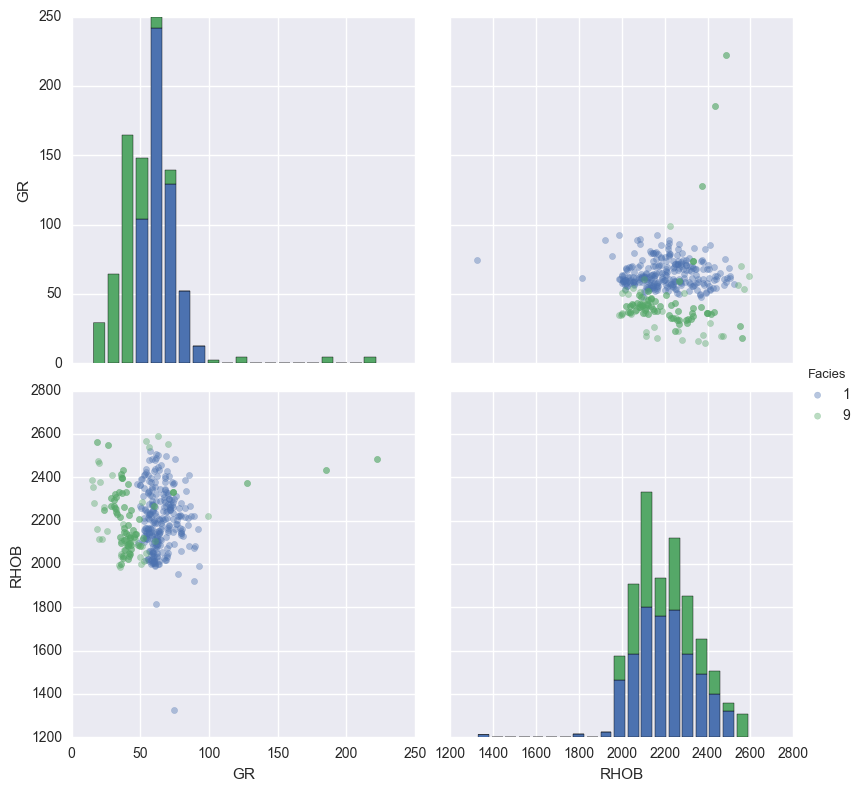

In [36]:
g = sns.PairGrid(selected_df, hue="Facies", vars=['GR','RHOB'], size=4)  
g.map_upper(plt.scatter,**dict(alpha=0.4))  
g.map_lower(plt.scatter,**dict(alpha=0.4))
g.map_diag(plt.hist,**dict(bins=20))  
g.add_legend()
g.set(alpha=0.5)

Let's create a model that classifies between those two classes using `scikit-learn`

---
# Scikit-learn classifiers

### For a classifier comparison check the source code [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

<img src="images/classifier_comparison_sklearn.png"></img>


*Choosing the right estimator:* Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
Different estimators are better suited for different types of data and different problems.
The flowchart below is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data.
Click on any estimator in the chart below to see its documentation.

In [ ]:
from IPython.display import Image
Image(filename='images/ml_map.png') 

[Click here for an interactive version](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [37]:
# Make X and y
X = selected_df[['GR','RHOB']].as_matrix()
y = selected_df['Facies'].values

Split the data into a training set and a test set

In [38]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Let's pick 3 different classifiers to train different models and then compare how well they perform

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [40]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5),
    ]

names = ['KNN', "Linear SVM", "RandomForest"]

In [42]:
classifiers

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
 SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False)]

Let's iterate over these classifiers and print common metrics to evaluate the performance of each model using the testing dataset we defined before

In [43]:
from sklearn.metrics import classification_report

target_names = ["sandstone", "bafflestone"]
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

KNN          ---------------
             precision    recall  f1-score   support

  sandstone       0.87      0.94      0.90        83
bafflestone       0.90      0.79      0.84        56

avg / total       0.88      0.88      0.88       139

Linear SVM   ---------------
             precision    recall  f1-score   support

  sandstone       0.87      1.00      0.93        83
bafflestone       1.00      0.79      0.88        56

avg / total       0.92      0.91      0.91       139

RandomForest ---------------
             precision    recall  f1-score   support

  sandstone       0.92      1.00      0.96        83
bafflestone       1.00      0.88      0.93        56

avg / total       0.95      0.95      0.95       139



# Parameter selection

Many of the models can be improved (or worsened) by changing the parameters that internally make the method work. It's always a good idea to check the documentation of each model (e.g. RandomForestClassifier [docs](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).

Scikit-learn offers a simple way to test different parameters for each model through a function called `GridSearchCV`

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[5, 10, 20, 30], 'max_depth':[2, 5, 10, 20]}

svc = RandomForestClassifier()

clf = GridSearchCV(svc, parameters, cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 30], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

`clf` can now tell us the best parameters to use with our `RandomForestClassifier`

In [46]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 10}

The nice thing about `scikit-learn`'s methods is that they're all consistent and behave in the same way. Notice how`GridSearchCV` was `.fit()`. That means that we can use it to `.predict()` and it will automatically use the best set of parameters!

In [47]:
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

             precision    recall  f1-score   support

  sandstone       0.90      1.00      0.95        83
bafflestone       1.00      0.84      0.91        56

avg / total       0.94      0.94      0.93       139



In [48]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 9, 1, 9, 9, 1, 9, 1, 1, 1, 9, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 9,
       1, 9, 1, 1, 1, 9, 1, 1, 9, 9, 9, 9, 1, 1, 9, 1, 1, 9, 1, 1, 9, 1, 1,
       9, 1, 9, 9, 9, 1, 1, 9, 1, 9, 9, 1, 9, 1, 1, 1, 1, 1, 1, 9, 9, 9, 1,
       1, 1, 1, 1, 1, 9, 9, 1, 9, 1, 9, 1, 9, 1, 1, 9, 1, 1, 1, 1, 1, 9, 9,
       1, 9, 9, 9, 1, 1, 1, 9, 1, 1, 9, 1, 1, 9, 1, 1, 9, 9, 1, 1, 9, 9, 1,
       1])

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[83,  0],
       [ 9, 47]])

# Plot confusion matrix

Confusion matrix, without normalization
[[83  0]
 [ 9 47]]


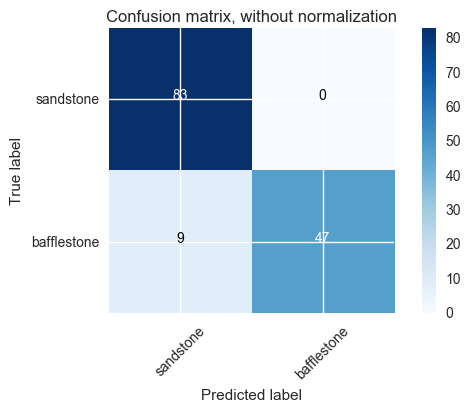

In [51]:
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
# np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

We can also predict individual values,

In [156]:
# say a rock with GR = 46 and RHOB = 2350
choice1 = [49,2250]

print(clf.predict(np.array([choice1])))

choice2 = [51,2175]
# say a rock with GR = 47 and RHOB = 2400
print(clf.predict(np.array([choice2])))

[9]
[1]


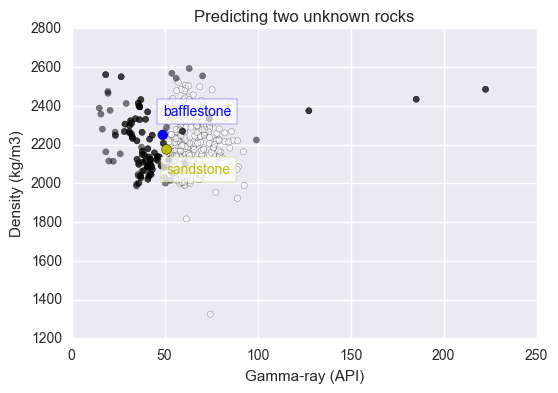

In [158]:
rhob = selected_df['RHOB']

rhob_selected = selected_df['RHOB'].as_matrix()
gr_selected = selected_df['GR'].as_matrix()

rhob_selected = selected_df['RHOB'].as_matrix()
gr_selected = selected_df['GR'].as_matrix()
plt.scatter(gr_selected, rhob_selected, c=selected_df["Facies"].as_matrix(), s=20, alpha=0.5)  
plt.scatter([choice1[0], choice2[0]],[choice1[1], choice2[1]], c=['b','y'], s=50, alpha=1.0)  
plt.text(choice1[0], choice1[1]+100,'bafflestone', color='b', alpha=1.0,
         bbox=dict(facecolor='w', edgecolor='b', alpha=0.75))  
plt.text(choice2[0], choice2[1]-125,'sandstone', color='y', alpha=1.0,
         bbox=dict(facecolor='w', edgecolor='y', alpha=0.75)) 
plt.xlabel('Gamma-ray (API)')
plt.ylabel('Density (kg/m3)')
plt.title('Predicting two unknown rocks')

### Paper with classifier comparison ([link](https://arxiv.org/abs/1708.05070))

<img src="images/model_performance.jpg"></img>

## The Data Science Hierarchy of Needs ([article](https://hackernoon.com/the-ai-hierarchy-of-needs-18f111fcc007))

<img src="images/the_ai_hierarchy_of_needs.png"></img>

# Machine Learning Glossary

https://developers.google.com/machine-learning/glossary/

<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>